In [58]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [59]:
train = pd.read_csv('/content/train_data.csv').dropna()
test = pd.read_csv('/content/test_data.csv').dropna()

In [60]:
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216.0,184.0,140.0,151.0,118.0,84.0,123.0,92.0,72.0,6.0
1,154,177,187,126,137,136,105,104,95,102,...,143.0,133.0,139.0,143.0,134.0,142.0,143.0,133.0,144.0,9.0
2,255,255,255,253,253,253,253,253,253,253,...,78.0,85.0,83.0,79.0,85.0,83.0,80.0,86.0,84.0,9.0
3,28,25,10,37,34,19,38,35,20,42,...,54.0,47.0,28.0,63.0,56.0,37.0,72.0,65.0,46.0,4.0
4,170,180,198,168,178,196,177,185,203,183,...,75.0,79.0,82.0,71.0,75.0,78.0,73.0,77.0,80.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9255,107,119,93,116,120,103,124,122,112,118,...,117.0,127.0,95.0,114.0,124.0,93.0,103.0,116.0,82.0,2.0
9256,85,83,62,60,59,38,71,70,49,77,...,182.0,203.0,158.0,150.0,170.0,121.0,136.0,156.0,106.0,6.0
9257,104,152,194,108,155,197,113,161,204,117,...,106.0,150.0,188.0,102.0,145.0,180.0,101.0,141.0,174.0,0.0
9258,169,219,235,173,224,241,172,223,241,175,...,136.0,146.0,123.0,135.0,145.0,122.0,118.0,127.0,106.0,8.0


In [61]:
x_train = train.drop(['label'],axis=1)
y_train = train['label']
x_test = test.drop(['label'],axis=1)
y_test = test['label']

In [62]:
x_train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,59,62,63,43,46,45,50,48,43,68,...,104.0,216.0,184.0,140.0,151.0,118.0,84.0,123.0,92.0,72.0
1,154,177,187,126,137,136,105,104,95,102,...,136.0,143.0,133.0,139.0,143.0,134.0,142.0,143.0,133.0,144.0
2,255,255,255,253,253,253,253,253,253,253,...,79.0,78.0,85.0,83.0,79.0,85.0,83.0,80.0,86.0,84.0
3,28,25,10,37,34,19,38,35,20,42,...,38.0,54.0,47.0,28.0,63.0,56.0,37.0,72.0,65.0,46.0
4,170,180,198,168,178,196,177,185,203,183,...,78.0,75.0,79.0,82.0,71.0,75.0,78.0,73.0,77.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9255,107,119,93,116,120,103,124,122,112,118,...,94.0,117.0,127.0,95.0,114.0,124.0,93.0,103.0,116.0,82.0
9256,85,83,62,60,59,38,71,70,49,77,...,175.0,182.0,203.0,158.0,150.0,170.0,121.0,136.0,156.0,106.0
9257,104,152,194,108,155,197,113,161,204,117,...,189.0,106.0,150.0,188.0,102.0,145.0,180.0,101.0,141.0,174.0
9258,169,219,235,173,224,241,172,223,241,175,...,126.0,136.0,146.0,123.0,135.0,145.0,122.0,118.0,127.0,106.0


In [63]:
y_test

,label
0,3.0
1,8.0
2,8.0
3,0.0
4,6.0
...,...
9233,8.0
9234,2.0
9235,0.0
9236,9.0


In [64]:
for i in (x_train, y_train, x_test, y_test):
  print(i.shape)

(9260, 3072)
(9260,)
(9238, 3072)
(9238,)


7.0


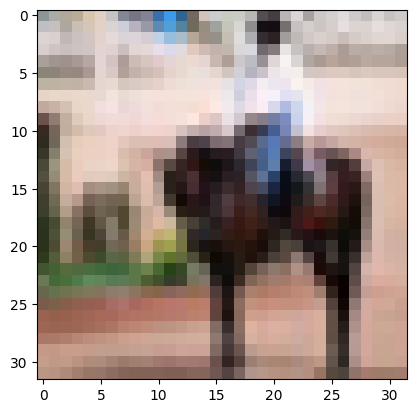

In [65]:
plt.imshow(x_train.iloc[11].values.reshape(32, 32, 3).astype(int))
print(y_train.iloc[11])
plt.show()

In [66]:
print(y_train.dropna().unique())

[6. 9. 4. 1. 2. 7. 8. 3. 5. 0.]


In [67]:
x_train = x_train.values.reshape(-1, 32, 32, 3)
x_test = x_test.values.reshape(-1, 32, 32, 3)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [68]:
x_train.shape

(9260, 32, 32, 3)

In [69]:
y_train.shape

(9260,)

In [70]:
x_test.shape

(9238, 32, 32, 3)

In [71]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [72]:
y_train = y_train.dropna()
y_test = y_test.dropna()

#converts the class labels (y_train) into one-hot encoded vectors.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

In [73]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
print(y_train.shape, y_test.shape)

(9260, 10) (9238, 10)


In [81]:
# from keras.layers import Dropout, Dense , Flatten , Conv2D, MaxPooling2D
# model = Sequential(
#     [
#         Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'),
#         # 32 --> This is the number of filters (also called kernels).
#         # (3,3) --> This is the filter size (kernel size).,
#         MaxPooling2D((2,2)),
#         Conv2D(64,(3,3),activation='relu'),
#         MaxPooling2D((2,2)),
#         Conv2D(64,(3,3),activation='relu')

#         # fully connected layers

#         ,Flatten()
#         ,Dense(64,activation='relu')
#         ,Dense(10,activation='softmax')
#     ]
# )

# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# model.summary()

from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    # Convolution + Pooling Block 1
    Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout added after pooling

    # Convolution + Pooling Block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout added after pooling

    # Convolution Block 3
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.25),  # Dropout added here too

    # Fully Connected Layers
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout added before output to prevent overfitting
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.1567 - loss: 2.2084 - val_accuracy: 0.3258 - val_loss: 1.9005
Epoch 2/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.2986 - loss: 1.8545 - val_accuracy: 0.4053 - val_loss: 1.6205
Epoch 3/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.3636 - loss: 1.6888 - val_accuracy: 0.4459 - val_loss: 1.5138
Epoch 4/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.4152 - loss: 1.6200 - val_accuracy: 0.4749 - val_loss: 1.4522
Epoch 5/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.4363 - loss: 1.5290 - val_accuracy: 0.4903 - val_loss: 1.4302
Epoch 6/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.4604 - loss: 1.4989 - val_accuracy: 0.5052 - val_loss: 1.3604
Epoch 7/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.4739 - loss: 1.4278 - val_accuracy: 0.5258 - val_loss: 1.3305
Epoch 8/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.4882 - loss: 1.4139 - 

<Axes: >

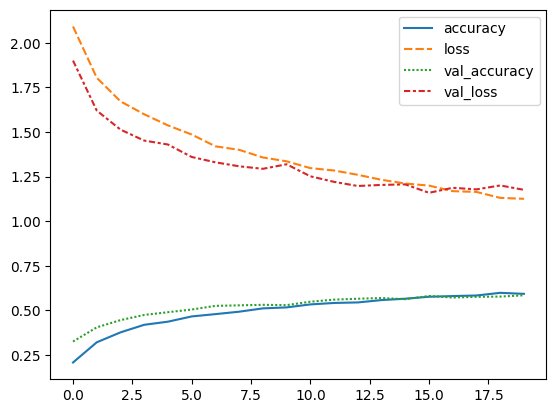

In [83]:
import seaborn as sns
sns.lineplot(model.history.history)

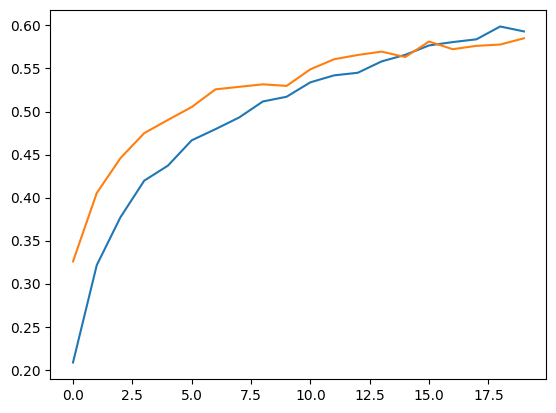

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

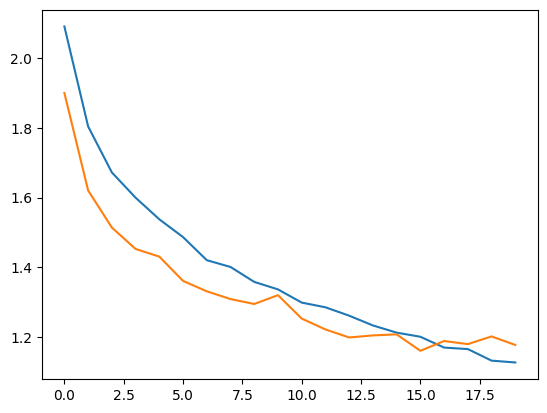

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [86]:
predictions = model.predict(x_test)

289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


3
3


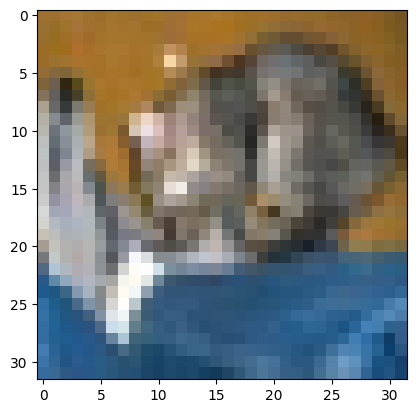

In [90]:
plt.imshow(x_test[0])
print(np.argmax(predictions[0]))
print(np.argmax(y_test[0]))

0
0


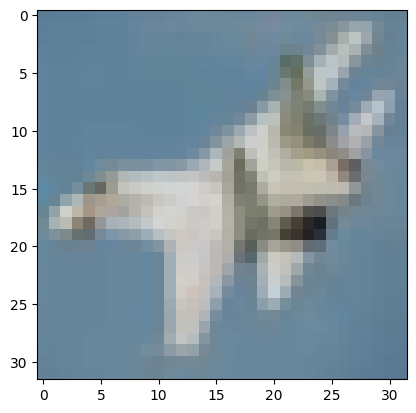

In [91]:
plt.imshow(x_test[10])
print(np.argmax(predictions[10]))
print(np.argmax(y_test[10]))